In [1]:
# Preliminaries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
# np.random.seed(42)
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
import tslearn

from dtaidistance import dtw
from dtaidistance import clustering

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


<AxesSubplot: xlabel='date'>

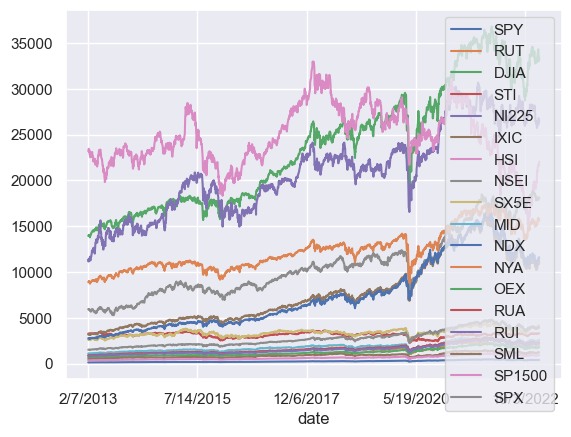

In [4]:
# import data
root = 'C:/Users/Allen/Desktop/IAQF/Data/'
data = pd.read_csv(root + 'all_data.csv', index_col='date', parse_dates=False)
data.plot()

In [5]:
# Z-score normalization
scale = StandardScaler().fit(data)
df = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
df

,SPY,RUT,DJIA,STI,NI225,IXIC,HSI,NSEI,SX5E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
date,,,,,,,,,,,,,,,,,,
2/7/2013,-1.409083,-1.575017,-1.490479,0.543499,-2.056457,-1.304472,-0.476850,-1.330804,-2.069398,-1.586208,-1.244888,-1.593027,-1.381276,-1.453519,-1.442882,-1.615018,-1.461383,-1.447769
2/8/2013,-1.401642,-1.559837,-1.482951,0.578546,-2.100014,-1.296224,-0.464945,-1.340698,-1.984724,-1.572171,-1.237232,-1.573928,-1.373025,-1.443117,-1.432803,-1.602315,-1.451236,-1.437939
2/14/2013,-1.397302,-1.532339,-1.485964,0.661418,-2.067093,-1.294849,-0.403149,-1.342534,-1.971518,-1.554750,-1.238320,-1.565721,-1.368359,-1.437757,-1.428734,-1.581533,-1.445932,-1.433967
2/15/2013,-1.398896,-1.534001,-1.484676,0.631014,-2.095599,-1.296752,-0.393381,-1.345211,-2.024054,-1.557723,-1.240101,-1.574858,-1.370741,-1.439419,-1.430407,-1.584865,-1.447870,-1.435798
2/19/2013,-1.388797,-1.509883,-1.476381,0.683194,-2.053196,-1.290565,-0.487172,-1.330552,-1.900861,-1.540388,-1.235309,-1.542102,-1.357750,-1.426386,-1.418057,-1.561916,-1.434510,-1.422963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/13/2023,1.504168,1.092869,1.642116,0.674894,1.096927,0.966673,-0.925557,2.037755,1.991393,1.620894,1.072283,1.640580,1.312375,1.352702,1.365173,1.424029,1.431003,1.418031
1/17/2023,1.496381,1.085402,1.581836,0.620496,1.101019,0.971250,-0.975789,2.064860,2.052924,1.609396,1.076422,1.624556,1.304173,1.345503,1.358007,1.405787,1.421314,1.408685
1/18/2023,1.429396,1.003833,1.487376,0.657638,1.240386,0.931619,-0.944481,2.096267,2.052950,1.539431,1.037719,1.516642,1.234283,1.275042,1.288387,1.324989,1.349517,1.337192


# Method used: Time Series K-means Clustering with Dynamic Time Warping
# This part of code isn't useful
reference: https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3

In [6]:
X = df.T

In [7]:
n_clusters_range = [2, 3, 4, 5, 6, 7, 8]
sil = {}

for n_clusters in n_clusters_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters,verbose=True, metric="dtw")
    clusters = kmeans.fit_predict(X)   
   
    # Calculate the silhouette score for each clustering result
    silhouette_avg = tslearn.clustering.silhouette_score(X, clusters, metric="dtw")
    sil[silhouette_avg] = n_clusters

print("For n_clusters =", sil[max(sil)], "The average silhouette_score is :", max(sil))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished


75.417 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished


16.423 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished


16.423 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished


27.903 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished


10.618 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished


10.618 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.5s finished


25.429 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


5.499 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


5.499 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

17.962 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.0s finished


4.211 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.0s finished


4.211 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.0s finished


4.211 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

6.834 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.4s finished


2.885 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.4s finished


2.885 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

3.595 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    2.8s finished


1.793 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    2.8s finished


1.793 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

3.925 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    3.2s finished


1.639 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    3.2s finished


1.639 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    3.2s finished


1.639 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    3.2s finished


For n_clusters = 2 The average silhouette_score is : 0.780268272892411


Note: KMeans chooses centeriods randomly in the initialization. It's thus quite random every-run. This silhouette_score evaluation for N of clusters has yielded results ranging from 2-4.

In [9]:
# clusterize
kmeans = TimeSeriesKMeans(n_clusters=4 ,verbose=True, metric="dtw")
clusters = kmeans.fit_predict(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


12.371 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.5s finished


5.747 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


5.744 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


5.744 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.5s finished


5.744 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


In [10]:
c = clusters.tolist()
c

[0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
# Visualize
clusters_dict = {0:[], 1:[], 2:[], 3:[]}

for i in range(12):
     clusters_dict[c[i]].append(X.index[i])

clusters_dict

{0: ['SPY', 'RUT', 'DJIA', 'NI225', 'IXIC', 'NSEI', 'MID', 'NDX', 'NYA'],
 1: ['HSI'],
 2: ['STI'],
 3: ['SX5E']}

<AxesSubplot: xlabel='date'>

<AxesSubplot: xlabel='date'>

<AxesSubplot: xlabel='date'>

<AxesSubplot: xlabel='date'>

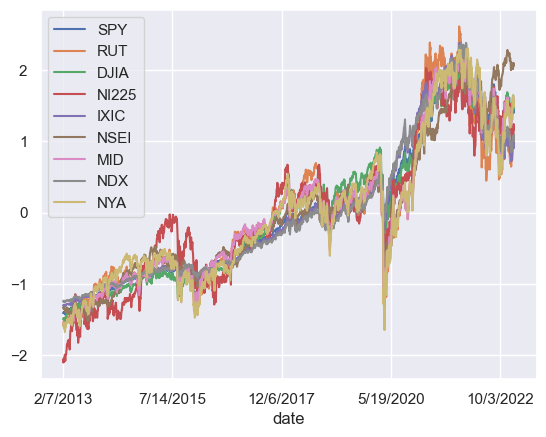

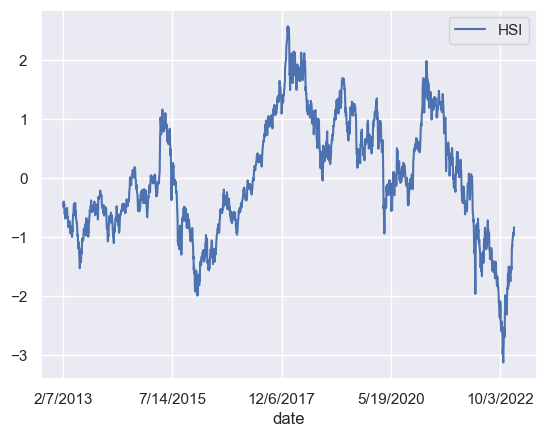

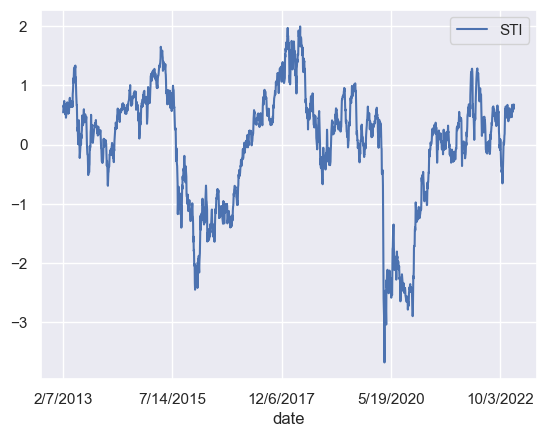

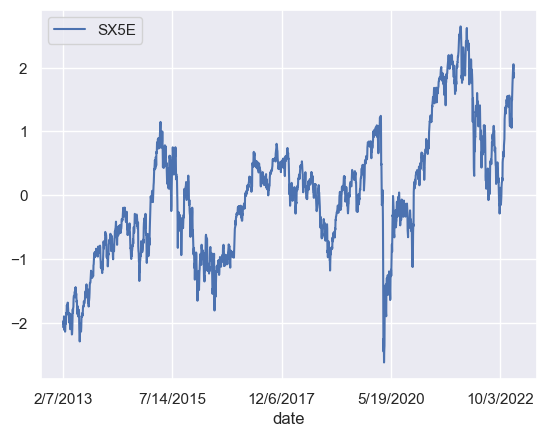

In [12]:
for l in clusters_dict.values():
    df[l].plot()
    

# DTW Hierarchical Clustering
Reference: https://github.com/wannesm/dtaidistance


In [13]:
Y = np.matrix(X)
labels = list(X.index)

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


array([[16.        , 17.        ,  0.57613394,  2.        ],
       [13.        , 14.        ,  0.61874316,  2.        ],
       [18.        , 19.        ,  1.12176318,  4.        ],
       [12.        , 20.        ,  1.31048779,  5.        ],
       [ 5.        , 10.        ,  1.33368371,  2.        ],
       [ 0.        , 21.        ,  1.61402634,  6.        ],
       [ 9.        , 11.        ,  2.59065948,  2.        ],
       [ 1.        , 15.        ,  3.23057862,  2.        ],
       [ 2.        , 23.        ,  3.83205746,  7.        ],
       [24.        , 25.        ,  3.99429212,  4.        ],
       [22.        , 26.        ,  5.42062898,  9.        ],
       [ 4.        , 27.        ,  6.45882611,  5.        ],
       [28.        , 29.        ,  9.56184254, 14.        ],
       [ 7.        , 30.        , 11.97376786, 15.        ],
       [ 8.        , 31.        , 19.75089117, 16.        ],
       [ 3.        ,  6.        , 27.4664409 ,  2.        ],
       [32.        , 33.

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

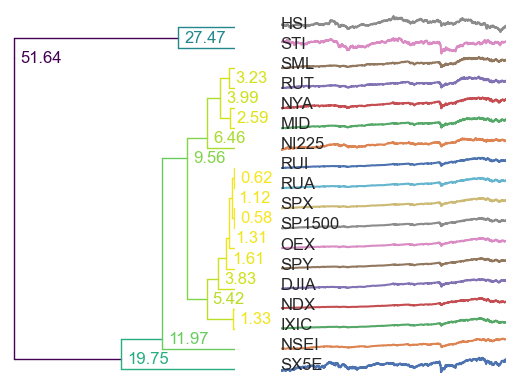

In [14]:
model = clustering.LinkageTree(dtw.distance_matrix_fast, {})
model.fit(Y)
model.plot(show_ts_label=lambda idx: labels[idx], show_tr_label=True, ts_label_margin=-10, ts_left_margin=10)

# DTW Pair Wise Scores

In [15]:
ds = dtw.distance_matrix_fast(Y)

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


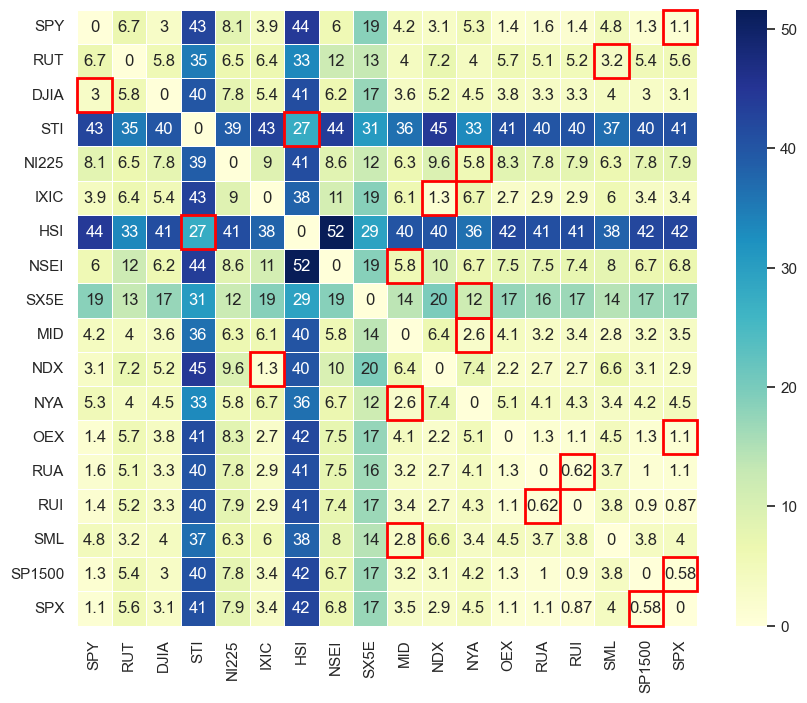

In [40]:
fig, ax = plt.subplots(figsize=(10,8)) 
ax = sns.heatmap(ds, linewidth=0.5, cmap="YlGnBu", xticklabels=labels, yticklabels=labels, annot=True)

for ind, row in enumerate(ds):
    mds = np.ma.masked_equal(row, 0, copy=False)
    min_col = np.argmin(mds)
    max_col = np.argmax(mds)
    _ = ax.add_patch(plt.Rectangle((min_col, ind), 1, 1, fc='none', ec='red', lw=2, clip_on=False))
plt.show()
